In [1]:
# -*- coding: utf-8 -*-
"""Untitled139.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1S8W7aqpPhu4KlsMBkHkXqiqD2dHwwLKe
"""

'Untitled139.ipynb\n\nAutomatically generated by Colaboratory.\n\nOriginal file is located at\n    https://colab.research.google.com/drive/1S8W7aqpPhu4KlsMBkHkXqiqD2dHwwLKe\n'

In [2]:
pip install tensorflow

     |████████████████████████████████| 462 kB 5.1 MB/s 


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam


In [4]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)


228827136/228813984 [==============================] - 1s 0us/step


In [5]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=32)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [7]:
class_names=train_ds.class_names

In [8]:
import matplotlib.pyplot as plt

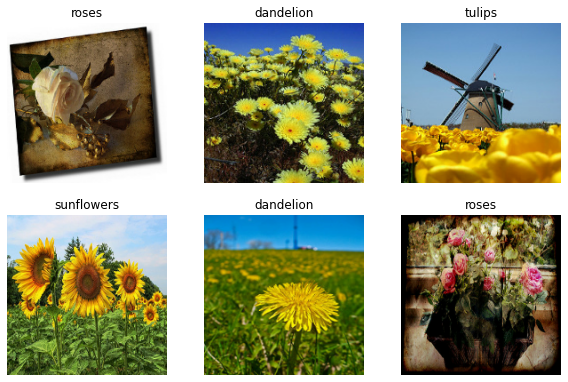

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [10]:
resnet_model = Sequential()

In [11]:
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False


94781440/94765736 [==============================] - 1s 0us/step


In [12]:
resnet_model.add(pretrained_model)

In [13]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))


In [14]:
resnet_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [15]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
tf.keras.utils.plot_model

<function keras.utils.vis_utils.plot_model>

In [17]:
epochs=10
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=epochs)


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 398s 4s/step - loss: 0.6749 - accuracy: 0.7807 - val_loss: 0.3709 - val_accuracy: 0.8542
Epoch 2/10
92/92 [==============================] - 389s 4s/step - loss: 0.2585 - accuracy: 0.9084 - val_loss: 0.3846 - val_accuracy: 0.8610
Epoch 3/10
92/92 [==============================] - 393s 4s/step - loss: 0.1769 - accuracy: 0.9353 - val_loss: 0.4549 - val_accuracy: 0.8474
Epoch 4/10
92/92 [==============================] - 391s 4s/step - loss: 0.0879 - accuracy: 0.9710 - val_loss: 0.3857 - val_accuracy: 0.8747
Epoch 5/10
92/92 [==============================] - 393s 4s/step - loss: 0.0528 - accuracy: 0.9867 - val_loss: 0.4128 - val_accuracy: 0.8706
Epoch 6/10
92/92 [==============================] - 393s 4s/step - loss: 0.0274 - accuracy: 0.9946 - val_loss: 0.4125 - val_accuracy: 0.8787
Epoch 7/10
92/92 [==============================] - 393s 4s/step - loss: 0.0156 - accuracy: 0.9973 - val_loss: 0.4224 - val_accuracy: 0.8774
Epoch 8/10
92/92 [======

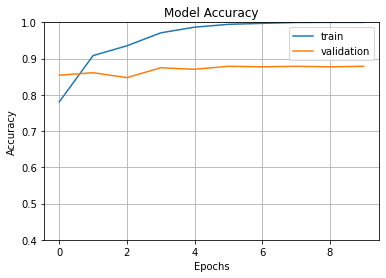

In [18]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [20]:
import cv2
image=cv2.imread('1.jpg')
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

In [21]:
pred=resnet_model.predict(image)

In [22]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is sunflowers


In [29]:
import cv2
image=cv2.imread('2.jpg')
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

In [30]:
pred=resnet_model.predict(image)

In [31]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is roses
